This report utilises machine learning to explore customer behaviour in the multi-channel retail domain. It applies K-Means clustering for customer segmentation and evaluates these segments with silhouette scores for targeted marketing strategies.

Supervised learning models are used to predict marketing campaign effectiveness and customer churn. Models like Random Forest and ensemble methods are examined, emphasising the balance between accuracy and business applicability. A quintile-based Linear Regression model is emphasised for reliable churn prediction, compared to a less effective continuous model.

The report concludes with recommendations for future research, including granular data analysis, residual analysis, and advanced regularisation techniques, showcasing the role of machine learning in enhancing customer engagement and guiding retail strategies.


# Data Preprocessing

Data preprocessing is a crucial stage in data analysis, focusing on cleaning, transforming, and streamlining data. It involves rectifying errors, inconsistencies, and inaccuracies to ensure data accuracy, completeness, and consistency. This process is vital for reliable decision-making, as it enhances data manageability and accuracy (Miller, 2019). This report outlines a preprocessing approach that ensures the integrity and quality of the data set for subsequent analyses.

In [ ]:
#Libraries used in this notebook

import pandas as pd                                                                          #For data manipulation and analysis
import seaborn as sns                                                                        #For statistical data visualisation
import matplotlib.pyplot as plt                                                              #For creating plots and charts
from sklearn.ensemble import RandomForestClassifier                                          #For the Random Forest classification algorithm
from sklearn.model_selection import train_test_split                                         #For splitting data into training and test sets
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve  #For model evaluation metrics
from sklearn.svm import SVC                                                                  #For Support Vector Machine classification
from sklearn.ensemble import GradientBoostingClassifier                                      #For Gradient Boosting classification algorithm
from sklearn.metrics import confusion_matrix                                                 #For Confusion Matrix
from sklearn.cluster import KMeans                                                           #For use of K++ clustering
import numpy as np                                                                           #For numerical operations
from sklearn.metrics import silhouette_score                                                 #For Silhouette Score
from sklearn.decomposition import PCA                                                        #For Principal Component Analysis to reduce dimensionality
from sklearn.preprocessing import StandardScaler                                             #For feature scaling to standardise the features' distribution
from sklearn.linear_model import LogisticRegression                                          #For Logistic Regression classification
from sklearn.tree import DecisionTreeClassifier                                              #For Decision Tree classification
from sklearn.ensemble import AdaBoostClassifier                                              #For AdaBoost ensemble classification
from sklearn.neighbors import KNeighborsClassifier                                           #For k-Nearest Neighbors classification
from sklearn.naive_bayes import GaussianNB                                                   #For Gaussian Naive Bayes classification
from sklearn.svm import SVC                                                                  #For Support Vector Classification
from xgboost import XGBClassifier                                                            #For XGBoost ensemble classification
from sklearn.metrics import accuracy_score, classification_report                            #For calculating model accuracy and classification report
from imblearn.over_sampling import RandomOverSampler                                         #For oversampling the minority class in an imbalanced dataset
from sklearn.ensemble import VotingClassifier                                                #For creating a Voting Classifier that combines the predictions of multiple models
from sklearn.linear_model import LinearRegression                                            #For Linear Regression modeling
from sklearn.metrics import mean_squared_error, r2_score                                     #For evaluating regression models using MSE and R^2
from sklearn.model_selection import cross_val_score                                          #For cross-validation of models
from sklearn.linear_model import Ridge, Lasso                                                #For Ridge and Lasso regression models that include L2 and L1 regularisation
from matplotlib.colors import LinearSegmentedColormap                                        #For creating a colourmap object for mapping numbers

In [ ]:
df=pd.read_csv("/content/ifood_df.csv") #Load dataset

In [ ]:
df.head() #Display the first 5 instances of the dataset

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
#Get the data types of each column
data_types = df.dtypes
print(data_types)

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

The dataset includes a wide range of attributes, from more specific metrics related to purchasing behaviour across multiple product categories to more fundamental demographic data such as age and marital status. Data on website visits, customer complaints, and customer interactions with marketing efforts are also included. This volume of information offers a thorough understanding of customer profiles and how they interact with the brand and its marketing initiatives. The dataset’s combination of Booleans, float and integers allows for a multidimensional analysis method that considers both the categorical and quantitative aspects of customer behaviour, enabling the use of several machine learning techniques.

In [ ]:
df.describe() #A summary of statistics for numerical columns in the DataFrame

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [ ]:
#Print all feature names
print("Feature Names:", df.columns.tolist())

#Display the number of features
print("Number of Features:", len(df.columns))

#Display the number of instances
print("Number of Instances:", len(df))

Feature Names: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']
Number of Features: 39
Number of Instances: 2205


In [ ]:
df.isna().sum() #Check for missing values

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [ ]:
df.nunique() #Check for unique values

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [ ]:
print(df.shape) #Print DataFrame dimensions
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True) #Drop columns
print(df.shape) #Print DataFrame dimensions

(2205, 39)
(2205, 37)


Key reprocessing steps included the removal of redundant columns, ‘Z_Cost Contact’ and ‘Z_Revenue’, reducing the feature set to 37. This refinement was crucial in maintaining focus on the most relevant data.

In [ ]:
df.duplicated().sum() #Check for duplicates

184

In [ ]:
print(df.shape) #Print DataFrame dimensions
df=df.drop_duplicates()
print(df.shape) #Print DataFrame dimensions

(2205, 37)
(2021, 37)


184 duplicate entries, which can skew analysis, were identified, and removed. This action refined the dataset from 2205 to 2021 instances, enhancing its authenticity.

In [ ]:
#Check for negative values in each column
negative_values = (df < 0).any()

#Display the columns with negative values -> True = negative value found
print(negative_values)

Income                  False
Kidhome                 False
Teenhome                False
Recency                 False
MntWines                False
MntFruits               False
MntMeatProducts         False
MntFishProducts         False
MntSweetProducts        False
MntGoldProds            False
NumDealsPurchases       False
NumWebPurchases         False
NumCatalogPurchases     False
NumStorePurchases       False
NumWebVisitsMonth       False
AcceptedCmp3            False
AcceptedCmp4            False
AcceptedCmp5            False
AcceptedCmp1            False
AcceptedCmp2            False
Complain                False
Response                False
Age                     False
Customer_Days           False
marital_Divorced        False
marital_Married         False
marital_Single          False
marital_Together        False
marital_Widow           False
education_2n Cycle      False
education_Basic         False
education_Graduation    False
education_Master        False
education_

In [ ]:
#Count negative values in each column
negative_values_count = (df < 0).sum()

#Display the count of negative values in each column
print(negative_values_count)

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         3
AcceptedCmpOverall      0
dtype: int64


The detection and exclusion of records with negative values in the 'MntRegularProds' column was another critical step. This measure addressed minor inconsistencies in the dataset, ensuring its consistency and validity.

In [ ]:
print(df.shape) #Print DataFrame dimensions

df = df[df['MntRegularProds'] >= 0]

print(df.shape) #Print DataFrame dimensions

(2021, 37)
(2018, 37)


Post these rigorous steps, the dataset was reduced to 2018 instances, each accurately representing a customer profile without redundancy or erroneous data.

In [ ]:
cleaned_df = df.copy() #save a copy of the DataFrame after it's cleaning

In [ ]:
#Download the cleaned_data as a csv file
df.to_csv('cleaned_data.csv', index=False)
from google.colab import files

files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ___


------





# Exploratory Data Analysis (EDA)

EDA is integral in uncovering underlying patterns and relationships, which are essential for informed decision-making in marketing strategies (IBM, 2023a).

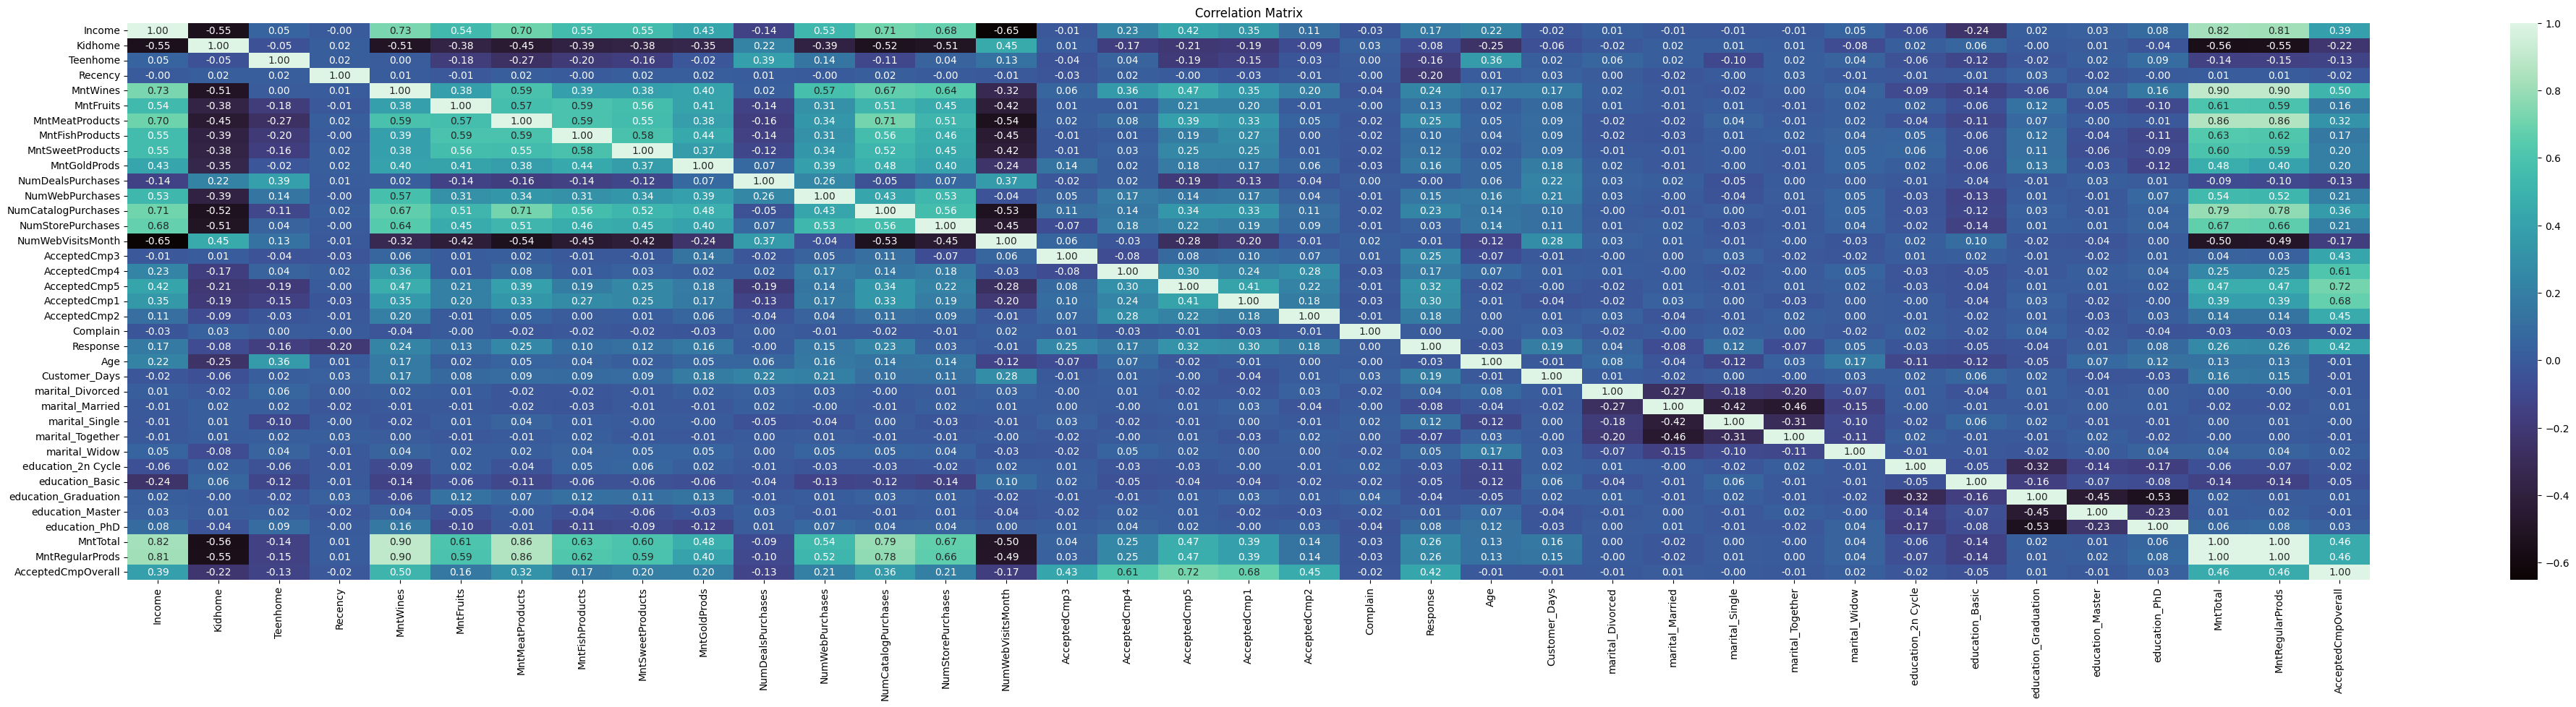

In [ ]:
#Compute the Correlation Matrix
corr_matrix = df.corr()

#Visualise the Correlation Matrix using the 'mako' palette
plt.figure(figsize=(50, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='mako')
plt.title('Correlation Matrix')
plt.show()

The foundation of this analysis was the creation of a correlation matrix visualised using the “Mako” colour palette. This large-scale, detailed heatmap provided a comprehensive view of the interdependencies between features and highlighted potential collinearities and valuable relationships that are important for predictive modelling. The diagonal running from the top left to the bottom right consists of 1s, which represented the correlation of each variable with itself (perfect correlation). This matrix was used to identify potential relationships between variables that might warrant further analysis.

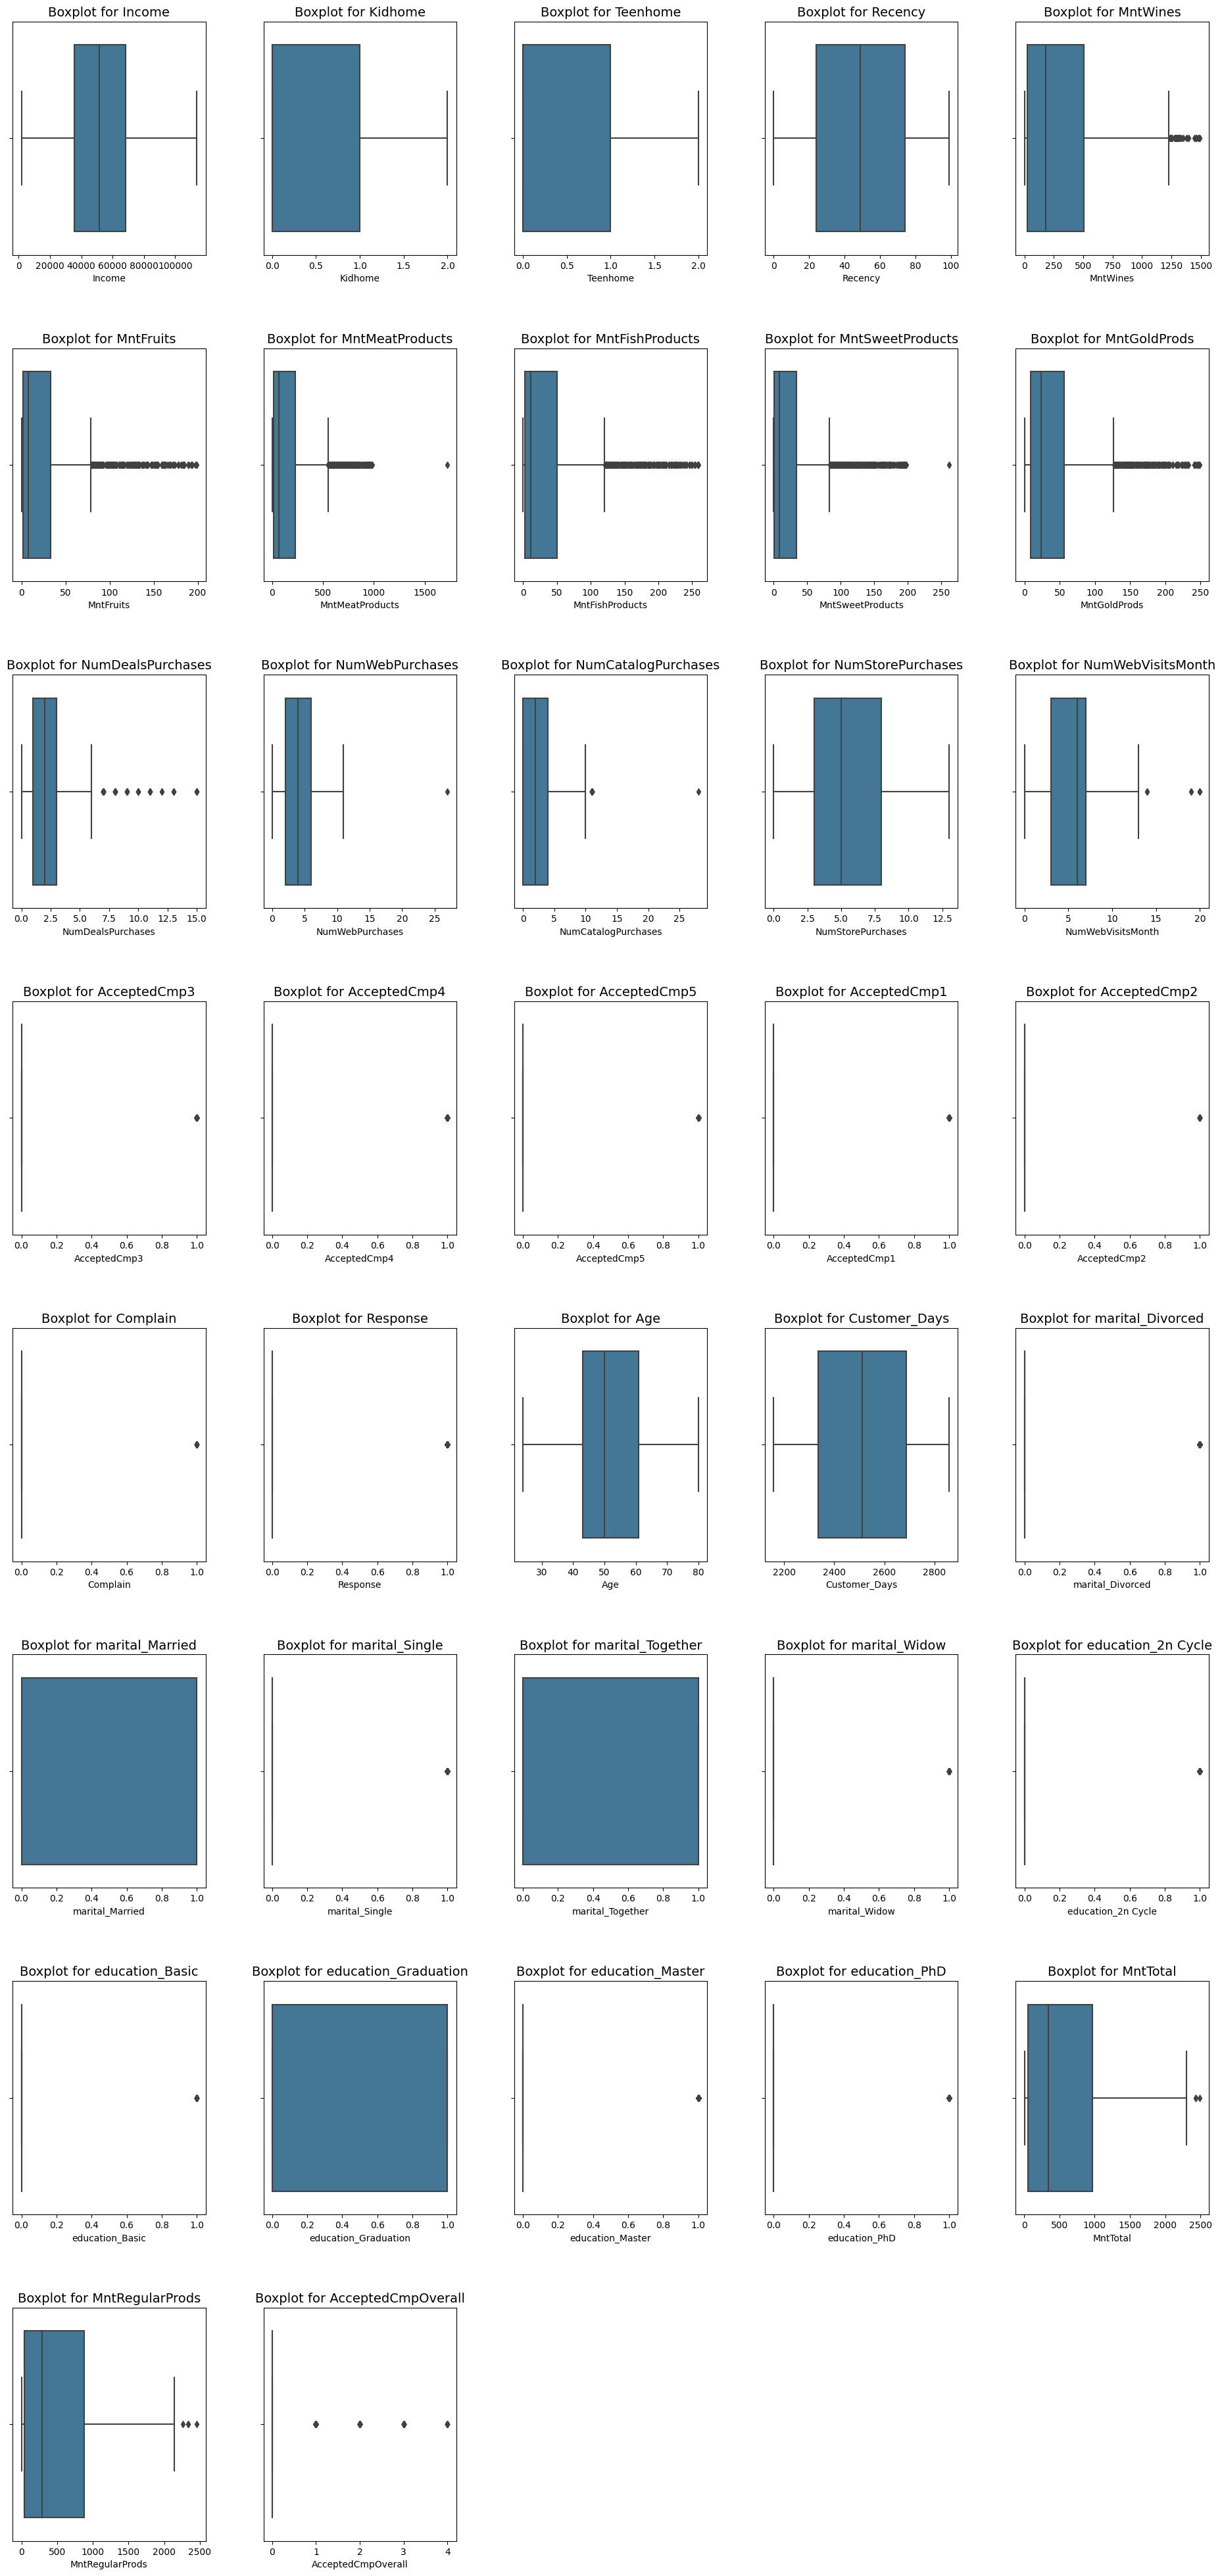

In [ ]:
features = df.columns  #All features

#Determine the layout of the subplots
n_features = len(features)
ncols = 5  #Define the number of columns for the subplots
nrows = n_features // ncols + (n_features % ncols > 0)  #Calculate the required number of rows

#Create the subplots with adjusted size and spacing
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5))
fig.tight_layout(pad=5.0)

#Plot each feature in the grid
for i, feature in enumerate(features):
    row = i // ncols
    col = i % ncols
    sns.boxplot(x=df[feature], ax=axes[row, col], palette="mako")  #Using 'mako' palette
    axes[row, col].set_title(f'Boxplot for {feature}', fontsize=14)

#If there are empty subplots, remove them
for i in range(n_features, nrows * ncols):
    if i < len(axes.flat):
        fig.delaxes(axes.flat[i])

plt.subplots_adjust(hspace=0.4, wspace=0.3)  #Adjust spacing
plt.show()

Further, a series of boxplots for each feature played a pivotal role in the identification of outliers. In the context of marketing data, these outliers were deemed crucial as they represented actual customer behaviour. The strategic decision to retain these outliers ensured that all market segments, including atypical behaviours, were adequately considered in future campaign strategies.

<ipython-input-19-035aa04f78e6>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x='Customer_Days', fill=True, palette='mako', color=palette[1])
<ipython-input-19-035aa04f78e6>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x='Age', fill=True, palette='mako', color=palette[2])
<ipython-input-19-035aa04f78e6>:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x='Income', fill=True, palette='mako', color=palette[3])
<ipython-input-19-035aa04f78e6>:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x='MntTotal', fill=True, palette='mako', color=palette[4])
<ipython-input-19-035aa04f78e6>:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x='Complain', fill=True, palette='mako', color=palette[5])


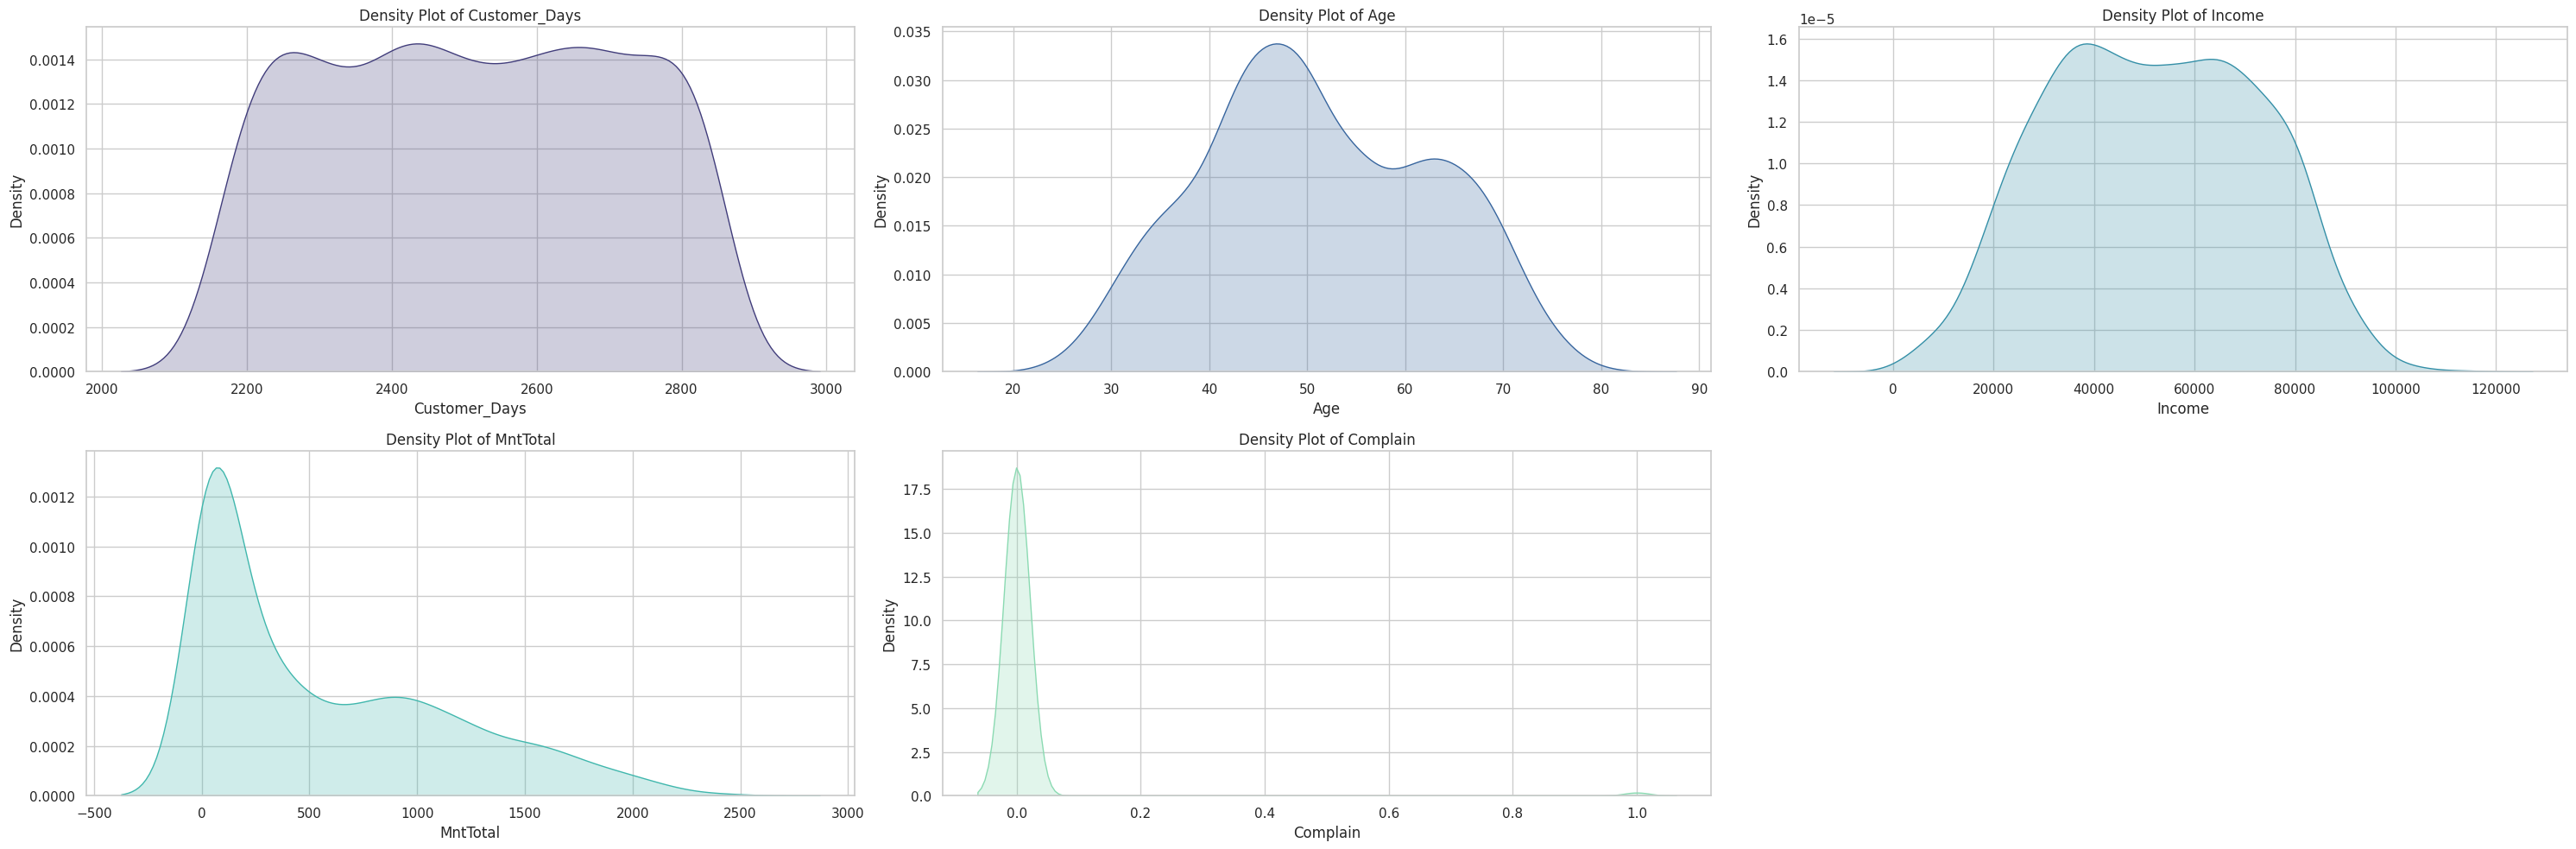

In [ ]:
#Set the visualisation style and colour palette
sns.set(style="whitegrid")
palette = sns.color_palette("mako", as_cmap=False)

#Set up the matplotlib figure
plt.figure(figsize=(30, 10))

#Subplot for 'Customer_Days'
plt.subplot(2, 3, 1)
sns.kdeplot(data=df, x='Customer_Days', fill=True, palette='mako', color=palette[1])
plt.title('Density Plot of Customer_Days')
plt.xlabel('Customer_Days')
plt.ylabel('Density')

#Subplot for 'Age'
plt.subplot(2, 3, 2)
sns.kdeplot(data=df, x='Age', fill=True, palette='mako', color=palette[2])
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')

#Subplot for 'Income'
plt.subplot(2, 3, 3)
sns.kdeplot(data=df, x='Income', fill=True, palette='mako', color=palette[3])
plt.title('Density Plot of Income')
plt.xlabel('Income')
plt.ylabel('Density')

#Subplot for 'MntTotal'
plt.subplot(2, 3, 4)
sns.kdeplot(data=df, x='MntTotal', fill=True, palette='mako', color=palette[4])
plt.title('Density Plot of MntTotal')
plt.xlabel('MntTotal')
plt.ylabel('Density')

#Subplot for 'Complain'
plt.subplot(2, 3, 5)
sns.kdeplot(data=df, x='Complain', fill=True, palette='mako', color=palette[5])
plt.title('Density Plot of Complain')
plt.xlabel('Complain')
plt.ylabel('Density')

#Adjust the layout
plt.tight_layout()

#Display the plots
plt.show()

Density plots for key features like 'Customer_Days', 'Age', 'Income', 'MntTotal', and 'Complain' offered deeper insights into the distribution of these variables. Using the same 'mako' colour palette, these plots helped in understanding the variability and skewness in the data, revealing the demographic and spending patterns of the customer base.

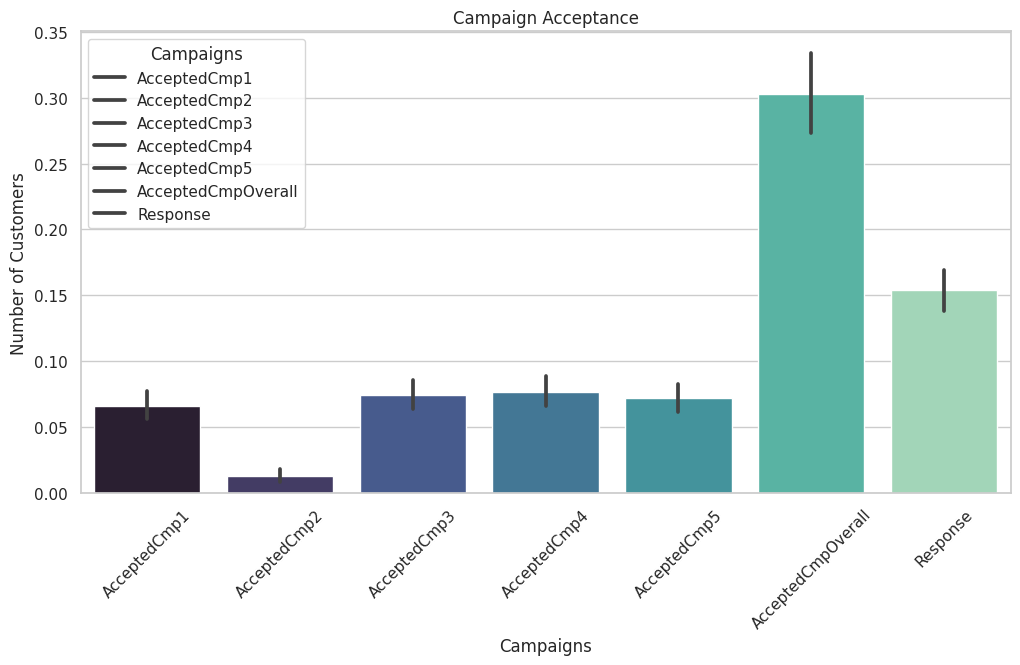

In [ ]:
#Create a DataFrame with campaign acceptance data
campaign_data = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmpOverall','Response']]

#Calculate the total number of customers who accepted each campaign
campaign_totals = campaign_data.sum()

#Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=campaign_data, palette='mako')
plt.xlabel('Campaigns')
plt.ylabel('Number of Customers')
plt.title('Campaign Acceptance')
plt.xticks(rotation=45)  #Rotate x-axis labels for better readability
plt.legend(title='Campaigns', labels=campaign_totals.index)
plt.show()

A focused analysis on campaign acceptance data was then carried out. By aggregating the data into a new DataFrame and computing the total number of customers who accepted each campaign, a grouped bar plot was created. This visualisation displayed the relative effectiveness of various campaigns, allowing for a quick assessment of which campaigns resonated most with the customer base. The visual results suggested that there was a significant variation in the success of individual campaigns. Campaign 4 was notably more effective compared to the other individual campaigns. The overall campaign success was good. The response rate was lower than the combined success of all campaigns.

## __


---








*The following section tackles three machine learning problems using algorithms tailored to each challenge. The selection was based on the learning type required and the unique aspects of each problem, ensuring an accurate application of machine learning to derive insightful solutions.*

# Customer Segmentation (Unsupervised Learning)

**Objective: The overall goal of this unsupervised learning model is to effectively segment the customer base into meaningful groups based on their purchasing behaviours and demographic characteristics.**

Feature Engineering

In [ ]:
#Affluent Enthusiasts

#Feature engineering for "Affluent Enthusiasts" into a single feature
#A new feature called "AffluentEnthusiastFeature" will be created, which is a weighted sum of the relevant features
#Positive weights for features that should be high, and a negative weight for 'NumDealsPurchases' as it should be low

#Defining the weights for each feature
feature_weights = {
    'Income': 1,              #Higher income is positive for this segment
    'MntWines': 1,            #Higher spending on wines
    'MntMeatProducts': 1,     #Higher spending on meat products
    'MntFishProducts': 1,     #Higher spending on fish products
    'MntSweetProducts': 1,    #Higher spending on sweet products
    'MntGoldProds': 1,        #Higher spending on gold products
    'MntTotal': 1,            #Higher total spending is positive
    'NumDealsPurchases': -1   #Negative weight as we want this to be low
}

#Feature Engineering: Calculate the weighted sum
df['AffluentEnthusiastFeature'] = df.apply(lambda row: sum(row[feature] * weight for feature, weight in feature_weights.items()), axis=1)

#Display the first few rows of the updated DataFrame
df[['Income', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal', 'NumDealsPurchases', 'AffluentEnthusiastFeature']].head()

,Income,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal,NumDealsPurchases,AffluentEnthusiastFeature
0,58138.0,635,546,172,88,88,1529,3,61193.0
1,46344.0,11,6,2,1,6,21,2,46389.0
2,71613.0,426,127,111,21,42,734,1,73073.0
3,26646.0,11,20,10,3,5,48,2,26741.0
4,58293.0,173,118,46,27,15,407,5,59074.0


In [ ]:
#Family-Focused Budget Shoppers

#Feature engineering for "Family-Focused Budget Shoppers" into a single feature
#Define the weights for each feature, considering the description of the segment

feature_weights_family_focused = {
    'Kidhome': 1,             #Higher weight for families with small children
    'Teenhome': 1,            #Higher weight for families with teenagers
    'Income': -1,             #Lower income
    'NumDealsPurchases': 1,   #Higher number of purchases made with discounts
    'MntWines': -0.5,         #Moderate to low spending on luxury items like wines
    'MntFruits': -0.5,        #Moderate to low spending on fruits
    'MntMeatProducts': -0.5,  #Moderate to low spending on meats
    'MntFishProducts': -0.5,  #Moderate to low spending on fish
    'MntSweetProducts': -0.5, #Moderate to low spending on sweets
    'MntGoldProds': -0.5      #Moderate to low spending on gold
}

#Feature Engineering: Calculate the weighted sum
df['FamilyFocusedBudgetFeature'] = df.apply(lambda row: sum(row[feature] * weight for feature, weight in feature_weights_family_focused.items()), axis=1)

#Display the first few rows of the updated DataFrame
df[['Kidhome', 'Teenhome', 'Income', 'NumDealsPurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'FamilyFocusedBudgetFeature']].head()

,Kidhome,Teenhome,Income,NumDealsPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,FamilyFocusedBudgetFeature
0,0,0,58138.0,3,635,88,546,172,88,88,-58943.5
1,1,1,46344.0,2,11,1,6,2,1,6,-46353.5
2,0,0,71613.0,1,426,49,127,111,21,42,-72000.0
3,1,0,26646.0,2,11,4,20,10,3,5,-26669.5
4,1,0,58293.0,5,173,43,118,46,27,15,-58498.0


In [ ]:
#Digital Natives and Online Shoppers

#Feature engineering for "Digital Natives and Online Shoppers" into a single feature
#Define the weights for each feature, considering the description of the segment

feature_weights_digital_natives = {
    'NumWebPurchases': 1,     #High number of purchases made through the company’s website
    'NumWebVisitsMonth': 1,   #High number of visits to company’s website in the last month
    'AcceptedCmp3': 1,        #Positive response to the 3rd online campaign
    'AcceptedCmp4': 1,        #Positive response to the 4th online campaign
    'AcceptedCmp5': 1,        #Positive response to the 5th online campaign
    'AcceptedCmp1': 1,        #Positive response to the 1st online campaign
    'AcceptedCmp2': 1,        #Positive response to the 2nd online campaign
    'Age': -0.5               #Younger age (negative weight as lower age is preferred)
}

#Feature Engineering: Calculate the weighted sum
df['DigitalNativeOnlineShopperFeature'] = df.apply(lambda row: sum(row[feature] * weight for feature, weight in feature_weights_digital_natives.items()), axis=1)

#Display the first few rows of the updated DataFrame
df[['NumWebPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Age', 'DigitalNativeOnlineShopperFeature']].head()

,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,DigitalNativeOnlineShopperFeature
0,8,7,0,0,0,0,0,63,-16.5
1,1,5,0,0,0,0,0,66,-27.0
2,8,4,0,0,0,0,0,55,-15.5
3,2,6,0,0,0,0,0,36,-10.0
4,5,5,0,0,0,0,0,39,-9.5


The objective of the unsupervised learning model detailed in this report was to segment the customer base into meaningful groups. These groups, or clusters, were based on purchasing behaviours and demographic characteristics. This segmentation aimed to identify distinct types of customers, such as 'Affluent Enthusiasts', 'Family-Focused Budget Shoppers', and 'Digital Natives and Online Shoppers'.
To achieve this, feature engineering was employed to synthesise new features that encapsulate the essence of each identified customer segment. The 'Affluent Enthusiast Feature' was crafted by assigning positive weights to variables indicative of high spending and a negative weight to the 'NumDealsPurchases' to reflect a preference for full-priced purchases over deals. In contrast, the 'Family-Focused Budget Feature' was designed with positive weights on features representing households with children and deal-seeking behaviours, while luxury spending was negatively weighted. The 'Digital Native Online Shopper Feature' favoured features illustrating high online engagement and campaign responsiveness, with a negative weight on age, assuming a younger demographic for this group.

**K-Means Clustering**

The K-Means clustering algorithm was selected for its efficacy in identifying distinct groups within a dataset (Mannor et al., 2011). For this model, three clusters were predetermined to reflect the three customer segments of interest, despite the Elbow Method suggesting an optimal cluster number of two. This decision was informed by domain knowledge and the business context, which necessitated a tripartite segmentation.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


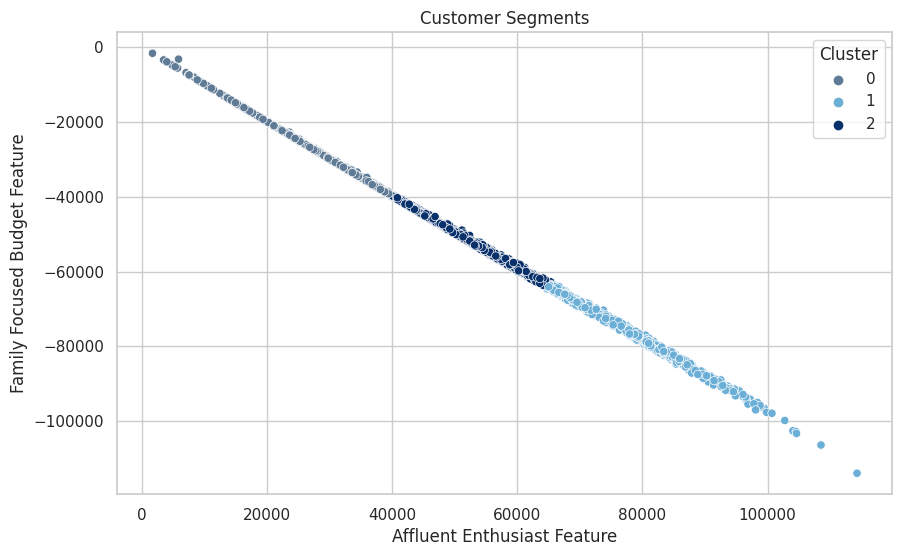

In [ ]:
#Selecting only the engineered features for clustering
features_for_clustering = ['AffluentEnthusiastFeature', 'FamilyFocusedBudgetFeature', 'DigitalNativeOnlineShopperFeature']
X = df[features_for_clustering]

#Using KMeans++ for clustering -> 3 clusters for the three customer segments
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

#Define a custom colour scale using hex codes
custom_colors = ["#5f7b96", "#6baed6", "#08306b"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

#Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=features_for_clustering[0], y=features_for_clustering[1], hue='Cluster', palette=custom_cmap)
plt.title('Customer Segments')
plt.title('Customer Segments')
plt.xlabel('Affluent Enthusiast Feature')
plt.ylabel('Family Focused Budget Feature')
plt.show()

#Due to the limitation of 2D plots, only two features are plotted against each other.

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.express as px

#Define a custom color scale using hex codes
custom_color_scale = [
    (0.0, "#5f7b96"),
    (0.5, "#6baed6"),
    (1.0, "#08306b"),
]

#Plotting the 3D clusters with the custom color scale
fig = px.scatter_3d(df, x='AffluentEnthusiastFeature', y='FamilyFocusedBudgetFeature', z='DigitalNativeOnlineShopperFeature', color='Cluster', color_continuous_scale=custom_color_scale)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Clusters were visualised through both 2D and 3D scatter plots, with a custom colour scale to distinguish between them. While 2D plots offer simplicity, they lack the capacity to represent the complexity of multi-dimensional data. The 3D plots, on the other hand, provided a more nuanced view of the customer segments in the context of the engineered features (Tian et al., 2021).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

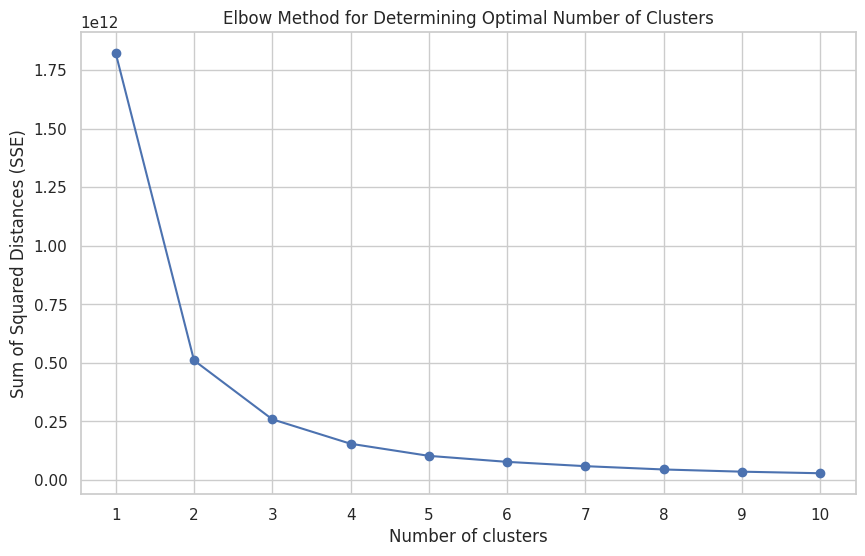

The optimal number of clusters (k) is: 2


In [ ]:
#Selecting the features used for clustering
features = df[['AffluentEnthusiastFeature', 'FamilyFocusedBudgetFeature', 'DigitalNativeOnlineShopperFeature']]

#Calculating Sum of Squared Errors (SSE) for a range of cluster numbers. A metric used to
#evaluate the quality of clustering solutions, measuring the total squared distance of each
#data point from its assigned cluster centroid
sse = []
for k in range(1, 11):  #Adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    sse.append(kmeans.inertia_)

#Plotting SSE against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.xticks(range(1, 11))
plt.show()

#Calculating the differences in SSE
differences = np.diff(sse)

#Finding the second derivative of the differences
second_derivative = np.diff(differences)

#The optimal k is where the second derivative is maximized
best_k = np.argmax(second_derivative) + 2  #Adding 2 because the second derivative is 2 steps behind the original series

print(f"The optimal number of clusters (k) is: {best_k}")

The Sum of Squared Errors (SSE) was calculated across a range of cluster numbers to assess the quality of clustering, with the Elbow Method guiding the selection of an optimal cluster count. However, the second derivative of the SSE indicated a preference for two clusters, which was ultimately overruled due to the business requirement of three distinct customer profiles.

In [ ]:
#Cluster labels
labels = df['Cluster']

#Calculating the silhouette score
silhouette_avg = silhouette_score(features, labels)
print(f"The silhouette score of the clustering: {silhouette_avg:.2f}")

The silhouette score of the clustering: 0.55


The silhouette score, a metric used to evaluate the coherence of clusters (Yadav, 2023), initially suggests a moderately strong clustering structure with a score of 0.55. This score represented a balance between cohesion with clusters and separation between them.

**Trying out PCA and Standard Scaler's influence on the
Cluster**

Explained variance ratio: [0.6842854  0.31563443]
The silhouette score of the PCA-based clustering: 0.39


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



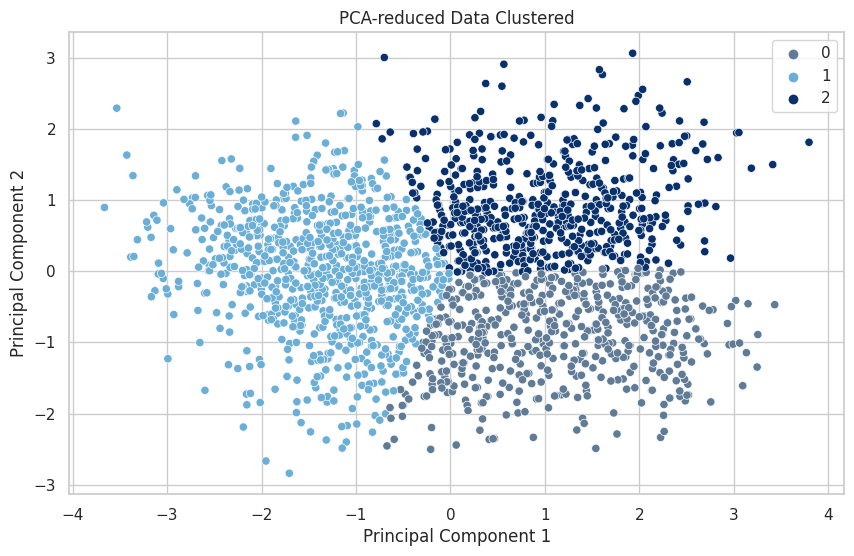

In [ ]:
#Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#How much variance is retained
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

#Perform KMeans clustering on the PCA-reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
df['Cluster_PCA'] = kmeans_pca.fit_predict(X_pca)

#Calculate the silhouette score for the clustering on PCA-reduced data
silhouette_avg_pca = silhouette_score(X_pca, df['Cluster_PCA'])
print(f"The silhouette score of the PCA-based clustering: {silhouette_avg_pca:.2f}")

#Define a custom color scale using hex codes
custom_color_scale = [
    (0.0, "#5f7b96"),
    (0.5, "#6baed6"),
    (1.0, "#08306b"),
]

#Create a custom colourmap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_color_scale)

#Plot the PCA-reduced data and the clusters using the custom colormap
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster_PCA'], palette=custom_cmap)
plt.title('PCA-reduced Data Clustered')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

PCA and Standard Scaler have dropped the silhouette score down from 0.55 to 0.39. This outcome suggested that PCA and standard scaling, while useful in certain contexts, might not be suitable for this dataset. The reduction in the silhouette score implied that the dimensionality reduction and scaling may have led to a loss of meaningful variance or altered cluster structures critical for the customer segmentation.

The unsupervised learning model successfully delineated customer segments, revealing groups such as 'Affluent Enthusiasts' and 'Family-Focused Budget Shoppers'. These findings offer a framework for personalised marketing strategies and resource allocation. For instance, the distinct spending patterns and demographic features of 'Affluent Enthusiasts' suggest targeted high-value product offerings, while the 'Family-Focused Budget Shoppers' could be engaged through discount-focused campaigns.
Feature engineering played a pivotal role in capturing the nuances of each segment, enabling the K-Means clustering algorithm to group customers effectively. The silhouette scores indicated moderate to strong cluster cohesion, substantiating the chosen segmentation despite alternatives presented by the Elbow Method. The 3D visualisations enhanced the understanding of the multi-dimensional nature of customer behaviours, solidifying the model's relevance to the domain.

# __


---



*Reverting back to the original DataFrame*

In [ ]:
#Revert back to the cleaned DataFrame
df = cleaned_df.copy()

#Display the first few rows of the reverted DataFrame
print(df.head())

#Print DataFrame dimensions
print(df.shape)

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

# ___

---



# Campaign Effectiveness Prediction (Supervised Learning)

**Objective: The primary objective is to predict whether a customer will accept an offer in a future marketing campaign.**


In [ ]:
#Handling missing values (if any)
df.fillna(df.mean(), inplace=True)

#Separating the target variable 'response' and features
X = df.drop('Response', axis=1)
y = df['Response']

#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Checking for any remaining preprocessing needs
missing_values = df.isnull().sum()
highly_correlated_features = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False)
high_corr = highly_correlated_features[(highly_correlated_features > 0.8) & (highly_correlated_features < 1)]

#Outputting the results of preprocessing checks
missing_values, high_corr

(Income                  0
 Kidhome                 0
 Teenhome                0
 Recency                 0
 MntWines                0
 MntFruits               0
 MntMeatProducts         0
 MntFishProducts         0
 MntSweetProducts        0
 MntGoldProds            0
 NumDealsPurchases       0
 NumWebPurchases         0
 NumCatalogPurchases     0
 NumStorePurchases       0
 NumWebVisitsMonth       0
 AcceptedCmp3            0
 AcceptedCmp4            0
 AcceptedCmp5            0
 AcceptedCmp1            0
 AcceptedCmp2            0
 Complain                0
 Response                0
 Age                     0
 Customer_Days           0
 marital_Divorced        0
 marital_Married         0
 marital_Single          0
 marital_Together        0
 marital_Widow           0
 education_2n Cycle      0
 education_Basic         0
 education_Graduation    0
 education_Master        0
 education_PhD           0
 MntTotal                0
 MntRegularProds         0
 AcceptedCmpOverall      0
 

In [ ]:
#Initialise models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
ada_boost = AdaBoostClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
svm = SVC()
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

#List of models
models = [logistic_regression, decision_tree, random_forest, gradient_boosting, ada_boost, knn, naive_bayes, svm, xgboost]

#Dictionary to hold model names and their respective accuracies
model_accuracies = {}

#Training and evaluating each model
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

model_accuracies

{'LogisticRegression': 0.8762376237623762,
 'DecisionTreeClassifier': 0.8102310231023102,
 'RandomForestClassifier': 0.8465346534653465,
 'GradientBoostingClassifier': 0.8745874587458746,
 'AdaBoostClassifier': 0.8762376237623762,
 'KNeighborsClassifier': 0.8514851485148515,
 'GaussianNB': 0.7953795379537953,
 'SVC': 0.863036303630363,
 'XGBClassifier': 0.8597359735973598}

A suite of models, including Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, AdaBoost, KNeighbors, GaussianNB, SVC, and XGBoost, were trained and evaluated. The performance of each model was assessed based on accuracy, with Logistic Regression, Gradient Boosting, and AdaBoost performing best, achieving an accuracy of approximately 87.6%.

In [ ]:
#Generating a performance report for each model

models = [logistic_regression, decision_tree, random_forest, gradient_boosting, ada_boost, knn, naive_bayes, svm, xgboost]

for model in models:
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred)

#Printing confusion matrices for each model
for model in models:
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    #Generating and printing the classification report
    report = classification_report(y_test, y_pred)
    print(f"Performance Report for {model_name}:\n{report}\n")

    #Generating and printing the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{cm}\n")

Performance Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       503
           1       0.68      0.51      0.59       103

    accuracy                           0.88       606
   macro avg       0.79      0.73      0.76       606
weighted avg       0.87      0.88      0.87       606


Confusion Matrix for LogisticRegression:
[[478  25]
 [ 50  53]]

Performance Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       503
           1       0.44      0.43      0.43       103

    accuracy                           0.81       606
   macro avg       0.66      0.66      0.66       606
weighted avg       0.81      0.81      0.81       606


Confusion Matrix for DecisionTreeClassifier:
[[447  56]
 [ 59  44]]

Performance Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0      

Classification reports and confusion matrices were generated for each model to provide deeper insights into their performance. The reports revealed varying levels of precision, recall, and F1-score across models, indicating differences in their ability to predict customer responses accurately.

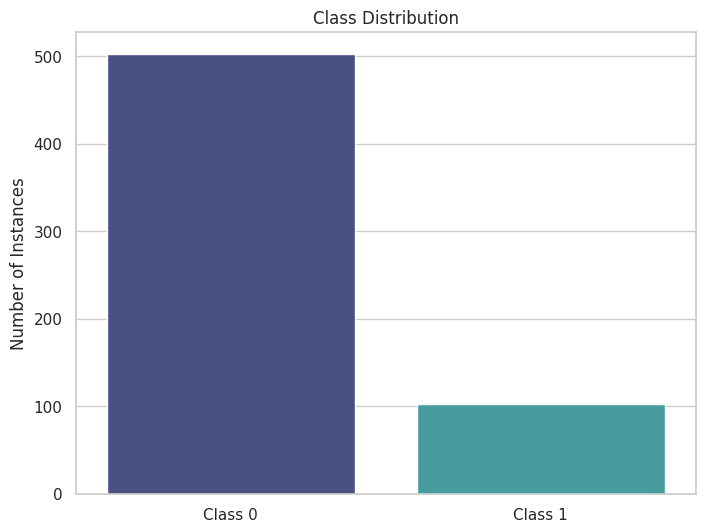

In [ ]:
class_counts = [503, 103]

#Define the 'mako' palette
palette = sns.color_palette("mako", len(class_counts))

#Plotting the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=['Class 0', 'Class 1'], y=class_counts, palette=palette)
plt.title('Class Distribution')
plt.ylabel('Number of Instances')
plt.show()

In [ ]:
#Initialise RandomOverSampler
ros = RandomOverSampler(random_state=42)

#Applying RandomOverSampler to the training data
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)

#Checking the new class distribution
new_class_distribution = pd.Series(y_train_ros).value_counts()
new_class_distribution

0    1204
1    1204
Name: Response, dtype: int64

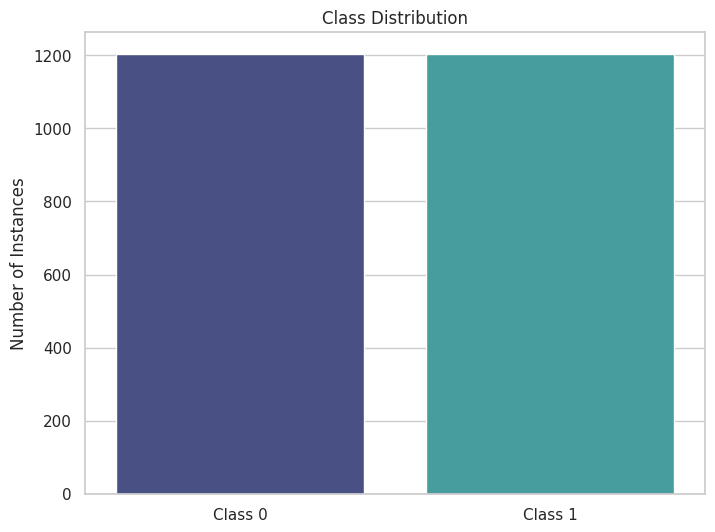

In [ ]:
class_counts = [1204, 1204]

#Define the 'mako' palette
palette = sns.color_palette("mako", len(class_counts))

#Plotting the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=['Class 0', 'Class 1'], y=class_counts, palette=palette)
plt.title('Class Distribution')
plt.ylabel('Number of Instances')
plt.show()

Recognising the potential bias introduced by class imbalance, RandomOverSampler was employed to balance the classes in the training data (Brownlee, 2020). This technique improved the minority class representation, potentially enhancing model performance for detecting positive responses.

In [ ]:
#Reapplying all the models on the oversampled data

#Reinitialising the models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
]

#Dictionary to hold new model names and their respective accuracies after applying RandomOverSampler
new_model_accuracies = {}

#Training and evaluating each model on the oversampled data
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train_ros, y_train_ros)
    y_pred_ros = model.predict(X_test_scaled)
    accuracy_ros = accuracy_score(y_test, y_pred_ros)
    new_model_accuracies[model_name] = accuracy_ros

new_model_accuracies

{'LogisticRegression': 0.801980198019802,
 'DecisionTreeClassifier': 0.7871287128712872,
 'RandomForestClassifier': 0.8564356435643564,
 'GradientBoostingClassifier': 0.8267326732673267,
 'AdaBoostClassifier': 0.8201320132013201,
 'KNeighborsClassifier': 0.7541254125412541,
 'GaussianNB': 0.7821782178217822,
 'SVC': 0.8118811881188119,
 'XGBClassifier': 0.8514851485148515}

Subsequent model training on the oversampled data revealed changes in accuracy, with the Random Forest classifier showing the best performance at approximately 86.1%. However, the improvement in accuracy must be weighed against the increased likelihood of overfitting due to the synthetic oversampling of the minority class.

In [ ]:
#Reinitialised models (after applying RandomOverSampler)
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
]

#Training and predicting with each model
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train_ros, y_train_ros)
    y_pred_ros = model.predict(X_test_scaled)

    #Generate and print the performance report
    report_ros = classification_report(y_test, y_pred_ros)
    print(f"Performance Report for {model_name} on Oversampled Data:\n{report_ros}\n")


    #Generate and print the confusion matrix
    cm_ros = confusion_matrix(y_test, y_pred_ros)
    print(f"Confusion Matrix for {model_name} on Oversampled Data:\n{cm_ros}\n")

Performance Report for LogisticRegression on Oversampled Data:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       503
           1       0.45      0.82      0.58       103

    accuracy                           0.80       606
   macro avg       0.70      0.81      0.73       606
weighted avg       0.87      0.80      0.82       606


Confusion Matrix for LogisticRegression on Oversampled Data:
[[402 101]
 [ 19  84]]

Performance Report for DecisionTreeClassifier on Oversampled Data:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       503
           1       0.38      0.34      0.36       103

    accuracy                           0.79       606
   macro avg       0.62      0.61      0.62       606
weighted avg       0.78      0.79      0.79       606


Confusion Matrix for DecisionTreeClassifier on Oversampled Data:
[[445  58]
 [ 68  35]]

Performance Report for RandomForestClass

Subsequent model training on the oversampled data revealed changes in accuracy, with the Random Forest classifier showing the best performance at approximately 86.1%. However, the improvement in accuracy must be weighed against the increased likelihood of overfitting due to the synthetic oversampling of the minority class.

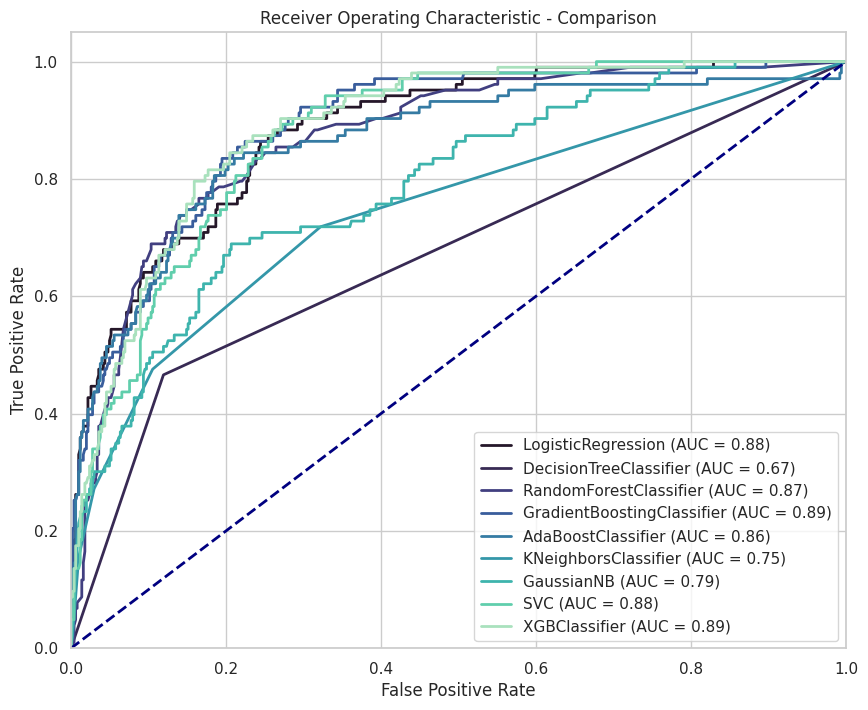

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Reinitialize your models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(probability=True),  # Ensure probability is True for ROC curve
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
]

# Setting the seaborn color palette to "Mako"
sns.set_palette("mako", n_colors=len(models))

# Setting the plot size
plt.figure(figsize=(10, 8))

# Fit each model and calculate ROC curve and AUC
for model in models:
    # Fit model
    model.fit(X_train_scaled, y_train)

    # Predict probabilities
    if model.__class__.__name__ == 'SVC':
        y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

# Plot format
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Comparison')
plt.legend(loc="lower right")
plt.show()


As an overview of the classification models tested in this study, the Gradient Boosting and XGBoost classifiers emerged as top performers, each with an AUC of 0.89, indicating a strong ability to differentiate between the positive and negative classes. Logistic Regression and Support Vector Classifier also showed robust results with an AUC of 0.88. The Decision Tree model displayed relatively weaker performance with an AUC of 0.67. The ensemble methods, particularly the boosting algorithms, seem to capture the complexities of the data well, suggesting that these models are better suited for the dataset's characteristics. However, while the ROC curve provided valuable insight into the true and false positive rates, additional metrics were considered to fully understand each model's performance.

In [ ]:
#Reinitialise the models
log_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()
ab_clf = AdaBoostClassifier()
kn_clf = KNeighborsClassifier()
gnb_clf = GaussianNB()
svc_clf = SVC(probability=True)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

#Train all the models on the oversampled data
log_clf.fit(X_train_ros, y_train_ros)
dt_clf.fit(X_train_ros, y_train_ros)
rf_clf.fit(X_train_ros, y_train_ros)
gb_clf.fit(X_train_ros, y_train_ros)
ab_clf.fit(X_train_ros, y_train_ros)
kn_clf.fit(X_train_ros, y_train_ros)
gnb_clf.fit(X_train_ros, y_train_ros)
svc_clf.fit(X_train_ros, y_train_ros)
xgb_clf.fit(X_train_ros, y_train_ros)

#Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('dt', dt_clf),
        ('rf', rf_clf),
        ('gb', gb_clf),
        ('ab', ab_clf),
        ('knn', kn_clf),
        ('gnb', gnb_clf),
        ('svc', svc_clf),
        ('xgb', xgb_clf)
    ],
    voting='hard'  # 'soft' for averaged probabilities or 'hard' for majority voting
)

#Train the voting classifier
voting_clf.fit(X_train_ros, y_train_ros)

#Make predictions and evaluate the voting classifier
y_pred_voting = voting_clf.predict(X_test_scaled)

#Print performance report
print(classification_report(y_test, y_pred_voting))

#Print confusion matrix
print(confusion_matrix(y_test, y_pred_voting))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       503
           1       0.55      0.61      0.58       103

    accuracy                           0.85       606
   macro avg       0.73      0.75      0.74       606
weighted avg       0.86      0.85      0.85       606

[[451  52]
 [ 40  63]]


An ensemble approach was adopted by creating a Voting Classifier comprising all individual models. This ensemble method aimed to combine the predictions from each model to improve overall accuracy and robustness. The voting classifier's performance report and confusion matrix indicated a balanced trade-off between precision and recall, achieving an accuracy of 84%.
This analysis emphasises the importance of aligning model evaluation with business objectives. While accuracy is important, the ultimate choice of model should consider the trade-offs between all performance metrics and their implications on campaign success and customer experience.


The supervised learning models addressed the key objective of predicting the success of marketing campaigns. The accuracy scores of Logistic Regression, Gradient Boosting, and AdaBoost, which hovered around 87.6%, were signifying a strong predictive capability. The ensemble approach provided a nuanced balance of precision and recall, potentially guiding the deployment of marketing resources more efficiently. However, the challenge of class imbalance was notable. The application of RandomOverSampler improved representation and predictive performance, especially for the Random Forest classifier, which emerged as the standout model. It is important to note that while improved accuracy is desirable, it is the trade-off between various metrics that will ultimately guide the practical application of these models in real-world scenarios.

# -


---



# Churn Prediction (Supervised Learning)

**Objective: To predict the likelihood of customers discontinuing their relationship with the company. Identifying potential churners allows for proactive engagement strategies.**

In [ ]:
print(df.shape) #Print DataFrame dimensions
df.head()

(2018, 37)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


**Feature Engineering -> RFM model**

In [ ]:
#Feature Engineering
df['Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases']
df['Recency'] = df['Recency']
df['Monetary'] = df['MntTotal']
df['DaysUntilChurn'] = 100 - df['Recency']  #Simple logic

The objective of the supervised learning model was to predict the likelihood of customers discontinuing their relationship with the company - a critical insight for implementing proactive engagement strategies. For feature engineering, the RFM (Recency, Frequency, Monetary) model was utilised. The 'DaysUntilChurn' feature was introduced with the logic that lower recency indicates a higher chance of churn.

**Plotting the RFM model**

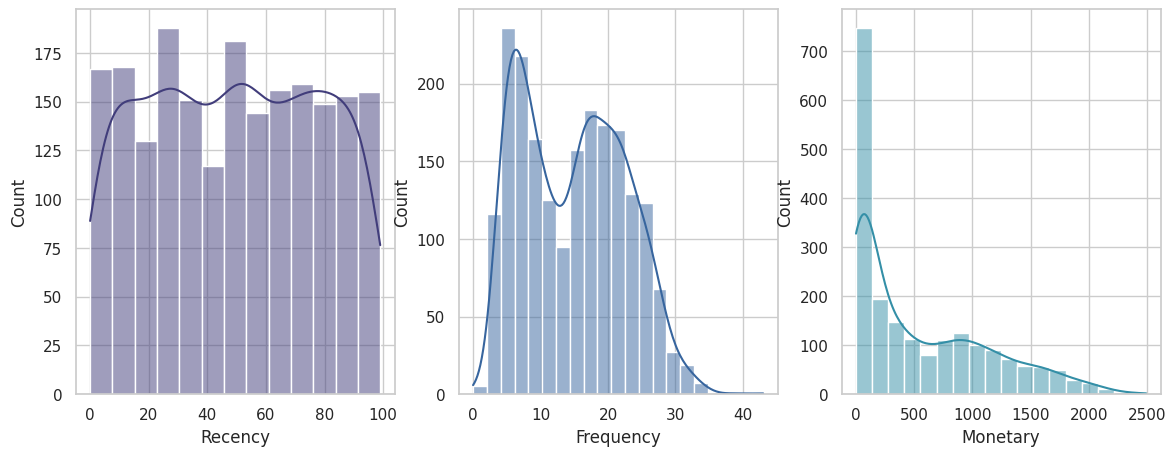

In [ ]:
#Define the 'mako' palette
palette = sns.color_palette("mako", as_cmap=False)

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Recency', kde=True, color=palette[1])    #Using the first color from the 'mako' palette

plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Frequency', kde=True, color=palette[2])  #Using the seecond color from the 'mako' palette

plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Monetary', kde=True, color=palette[3])   #Using the third color from the 'mako' palette

plt.show()

**Model Development and Evaluation**


In [ ]:
#Split the dataset into training and holdout sets
df_train, df_holdout = train_test_split(df, test_size=0.1, random_state=42)

#Calculate quintiles for each of the RFM metrics on the training data
df_train['RecencyQuintile'] = pd.qcut(df_train['Recency'], 5, labels=False, duplicates='drop')
df_train['FrequencyQuintile'] = pd.qcut(df_train['Frequency'], 5, labels=False, duplicates='drop')
df_train['MonetaryQuintile'] = pd.qcut(df_train['MntTotal'], 5, labels=False, duplicates='drop')

#Prepare independent (X) and dependent (y) variables for the quintile-based model
X_quintile = df_train[['RecencyQuintile', 'FrequencyQuintile', 'MonetaryQuintile']]
y_quintile = df_train['DaysUntilChurn']

#For the continuous model, use the actual values of the RFM metrics
X_continuous = df_train[['Recency', 'Frequency', 'MntTotal']]

#Scale the features for the continuous model
scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(X_continuous)

#Split the training dataset into training and testing sets for both models
X_train_quintile, X_test_quintile, y_train_quintile, y_test_quintile = train_test_split(X_quintile, y_quintile, test_size=0.3, random_state=42)
X_train_continuous, X_test_continuous, y_train_continuous, y_test_continuous = train_test_split(X_continuous_scaled, y_quintile, test_size=0.3, random_state=42)

#Train both models
model_quintile = LinearRegression().fit(X_train_quintile, y_train_quintile)
model_continuous = LinearRegression().fit(X_train_continuous, y_train_continuous)

#Make predictions with both models on the test set
predictions_quintile = model_quintile.predict(X_test_quintile)
predictions_continuous = model_continuous.predict(X_test_continuous)

#Evaluate both models on the test set
mse_quintile = mean_squared_error(y_test_quintile, predictions_quintile)
r2_quintile = r2_score(y_test_quintile, predictions_quintile)

mse_continuous = mean_squared_error(y_test_continuous, predictions_continuous)
r2_continuous = r2_score(y_test_continuous, predictions_continuous)

#Print out MSE and R2 score for both models
print("Test Set - Quintile-based Model - Mean Squared Error:", mse_quintile)
print("Test Set - Quintile-based Model - R2 Score:", r2_quintile)
print("Test Set - Continuous Model - Mean Squared Error:", mse_continuous)
print("Test Set - Continuous Model - R2 Score:", r2_continuous)

#Prepare the holdout set using the same transformations as the training set
df_holdout['RecencyQuintile'] = pd.qcut(df_holdout['Recency'], 5, labels=False, duplicates='drop')
df_holdout['FrequencyQuintile'] = pd.qcut(df_holdout['Frequency'], 5, labels=False, duplicates='drop')
df_holdout['MonetaryQuintile'] = pd.qcut(df_holdout['MntTotal'], 5, labels=False, duplicates='drop')

X_holdout_quintile = df_holdout[['RecencyQuintile', 'FrequencyQuintile', 'MonetaryQuintile']]
X_holdout_continuous = scaler.transform(df_holdout[['Recency', 'Frequency', 'MntTotal']])  # Use the same scaler
y_holdout = df_holdout['DaysUntilChurn']

#Make predictions on the holdout set with both models
holdout_predictions_quintile = model_quintile.predict(X_holdout_quintile)
holdout_predictions_continuous = model_continuous.predict(X_holdout_continuous)

#Evaluate both models on the holdout set
holdout_mse_quintile = mean_squared_error(y_holdout, holdout_predictions_quintile)
holdout_r2_quintile = r2_score(y_holdout, holdout_predictions_quintile)

holdout_mse_continuous = mean_squared_error(y_holdout, holdout_predictions_continuous)
holdout_r2_continuous = r2_score(y_holdout, holdout_predictions_continuous)

#Print out MSE and R2 score for both models on the holdout set
print("Holdout Set - Quintile-based Model - Mean Squared Error:", holdout_mse_quintile)
print("Holdout Set - Quintile-based Model - R2 Score:", holdout_r2_quintile)
print("Holdout Set - Continuous Model - Mean Squared Error:", holdout_mse_continuous)
print("Holdout Set - Continuous Model - R2 Score:", holdout_r2_continuous)

# Feature Importance Analysis for the quintile-based model
feature_importance_quintile = pd.DataFrame({
    'Feature': ['RecencyQuintile', 'FrequencyQuintile', 'MonetaryQuintile'],
    'Importance': model_quintile.coef_  # Use the coefficients from the quintile-based model
})
print(feature_importance_quintile.sort_values(by='Importance', ascending=False))

Test Set - Quintile-based Model - Mean Squared Error: 30.527407783683937
Test Set - Quintile-based Model - R2 Score: 0.9645813667942669
Test Set - Continuous Model - Mean Squared Error: 1.687149121331397e-28
Test Set - Continuous Model - R2 Score: 1.0
Holdout Set - Quintile-based Model - Mean Squared Error: 51.16011969557534
Holdout Set - Quintile-based Model - R2 Score: 0.935084899680118
Holdout Set - Continuous Model - Mean Squared Error: 1.8357808630014516e-28
Holdout Set - Continuous Model - R2 Score: 1.0
             Feature  Importance
1  FrequencyQuintile    0.153027
2   MonetaryQuintile    0.069858
0    RecencyQuintile  -20.193190


The results suggest that the continuous model is performing extremely well, with an R2 score of 1.0 and a very low Mean Squared Error (MSE) close to zero on both the test and holdout sets. These metrics suggest that the model's predictions are almost exactly matching the actual values.

However, the MSE values being effectively zero and the R2 scores being exactly 1.0 are highly unusual in real-world data and typically indicate overfitting.

**Visualisation of Predictive Model Accuracy on Holdout Data**

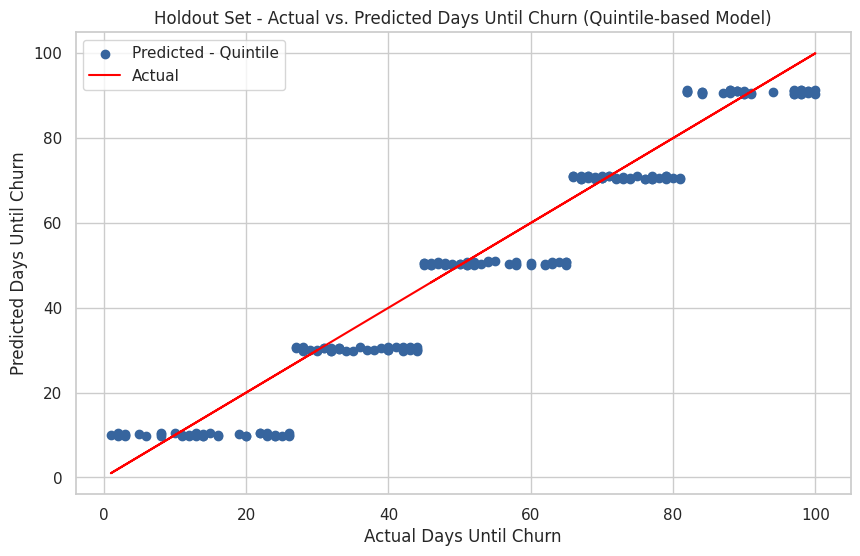

In [ ]:
# Use the 'mako' palette for the scatter plot
palette = sns.color_palette("mako", as_cmap=False)

# Assign the quintile-based model predictions to final_predictions
final_predictions = holdout_predictions_quintile

# Plot actual vs predicted values for the quintile-based model using the 'mako' palette
plt.figure(figsize=(10, 6))
plt.scatter(y_holdout, final_predictions, color=palette[2], label='Predicted - Quintile')
plt.plot(y_holdout, y_holdout, color='red', label='Actual')  # Ideal prediction line
plt.title('Holdout Set - Actual vs. Predicted Days Until Churn (Quintile-based Model)')
plt.xlabel('Actual Days Until Churn')
plt.ylabel('Predicted Days Until Churn')
plt.legend()
plt.grid(True)
plt.show()

**Segment-wise Analysis of Predicted Versus Actual Churn Days**

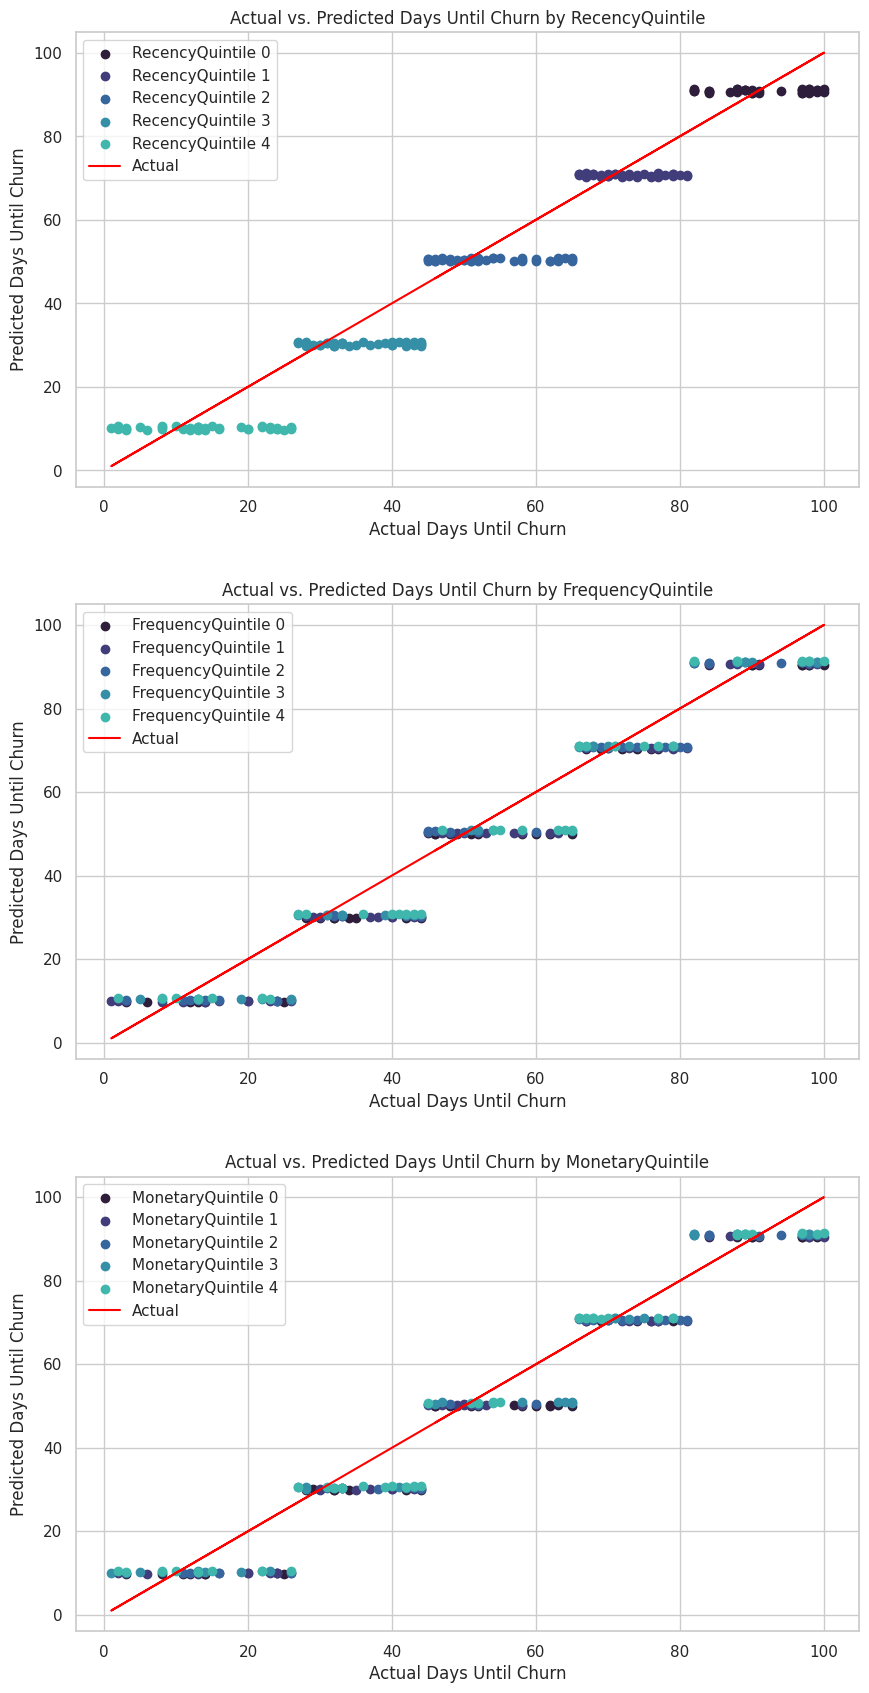

In [ ]:
#Add the predictions to the holdout DataFrame
df_holdout['PredictedDaysUntilChurn'] = holdout_predictions_quintile

#Define the segments
segments = ['RecencyQuintile', 'FrequencyQuintile', 'MonetaryQuintile']

#Define the 'mako' palette
palette = sns.color_palette("mako", as_cmap=False)

#Plot setup
fig, axes = plt.subplots(nrows=len(segments), ncols=1, figsize=(10, 6 * len(segments)))
fig.tight_layout(pad=5.0)

#Plot actual vs. predicted values by segment using the 'mako' palette
for i, segment in enumerate(segments):
    for quintile in sorted(df_holdout[segment].unique()):
        subset = df_holdout[df_holdout[segment] == quintile]
        axes[i].scatter(subset['DaysUntilChurn'], subset['PredictedDaysUntilChurn'], label=f'{segment} {quintile}', color=palette[quintile])
    axes[i].plot(df_holdout['DaysUntilChurn'], df_holdout['DaysUntilChurn'], color='red', label='Actual')  #Ideal prediction line
    axes[i].set_title(f'Actual vs. Predicted Days Until Churn by {segment}')
    axes[i].set_xlabel('Actual Days Until Churn')
    axes[i].set_ylabel('Predicted Days Until Churn')
    axes[i].legend()
    axes[i].grid(True)

plt.show()

The outcome is a set of three scatter plots, each representing the actual vs. predicted 'Days Until Churn' for different quintiles of Recency, Frequency, and Monetary value, which are key components of the RFM model.

1. Recency Quintile Plot: The top plot shows that as the recency quintile increases (indicating less recent interaction with the company), the predicted 'Days Until Churn' also increases. This is consistent with the theory that customers who have not interacted recently are at a higher risk of churning.

2. Frequency Quintile Plot: The middle plot represents different levels of customer purchase frequency. There is a mix of points above and below the actual line, suggesting the predictions are not consistently over or underestimating the 'Days Until Churn' based on frequency alone.

3. Monetary Quintile Plot The bottom plot for Monetary quintile shows that higher monetary values are associated with a lower predicted 'Days Until Churn', which could indicate that customers who spend more are less likely to churn, a common trend in customer behavior.

Across all three plots:

- **Quintile Levels**: Each color represents a different quintile, with quintile 0 likely being the lowest (e.g., least recent, least frequent purchases, lowest spend) and quintile 4 being the highest.

- **Alignment with Red Line**: The red line represents the perfect prediction. Dots that fall on this line are where the model's predictions match the actual 'Days Until Churn'.

- **Predictive Performance**: The dots spread around the red line indicate the variance in the model's predictions. Ideally, the dots have to be as close to the red line as possible, indicating accurate predictions.

- **Quintile Insights**: By looking at how the predictions for each quintile compare to the red line, we can deduce which quintiles the model is predicting more or less accurately.

For example, in the Monetary quintile plot, if the higher quintiles (which represent higher spend) consistently have predicted values close to the red line, the model is more accurate for customers who spend more. Conversely, if lower quintiles have predictions that deviate significantly from the red line, the model is less accurate for customers who spend less.

These plots provide actionable insights into how well the model is predicting churn across different customer segments based on RFM metrics.

**Cross-Validation of Models**

In [ ]:
#Define the number of folds for cross-validation
cv_folds = 10

#Apply cross-validation
scores_quintile = cross_val_score(LinearRegression(), X_quintile, y_quintile, cv=cv_folds, scoring='r2')

#Print the cross-validation scores and average score
print(f'Cross-validation R2 scores for the Quintile-based Model: {scores_quintile}')
print(f'Average R2 score for the Quintile-based Model: {scores_quintile.mean()}')

#Apply cross-validation
scores_continuous = cross_val_score(LinearRegression(), X_continuous_scaled, y_quintile, cv=cv_folds, scoring='r2')

#Print the cross-validation scores and average score
print(f'Cross-validation R2 scores for the Continuous Model: {scores_continuous}')
print(f'Average R2 score for the Continuous Model: {scores_continuous.mean()}')

Cross-validation R2 scores for the Quintile-based Model: [0.96298613 0.95187006 0.9657746  0.96204307 0.96844411 0.9524738
 0.95290713 0.96137618 0.96195308 0.96158246]
Average R2 score for the Quintile-based Model: 0.9601410640801269
Cross-validation R2 scores for the Continuous Model: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average R2 score for the Continuous Model: 1.0


*Quintile-Based Model*

- **Cross-Validation R2 Scores**: The cross-validation R2 scores are very high, averaging around 0.9601. This indicates a strong model performance across different subsets of the training data.
- **Test Set Performance**: On the test set, the quintile-based model also performs well with an R2 score of 0.9660, which is consistent with the cross-validation results.
- **Holdout Set Performance**: The R2 score on the holdout set is 0.9345, slightly lower than the cross-validation and test set scores, indicating some reduction in performance on unseen data but still a strong model.

*Continuous Model*
- **Cross-Validation R2 Scores**: The cross-validation R2 scores are consistently 1.0. While this might seem ideal, it's unusually perfect and could indicate that the model is overfitting the training data.
- **Test Set Performance**: The test set R2 score is also 1.0, and the mean squared error is extremely close to zero. This further suggests overfitting, as it's rare for any real-world model to achieve perfect predictions.
- **Holdout Set Performance**: Similar to the test set, the holdout set also shows an R2 score of 1.0 and an MSE close to zero, which is unusual and further supports the overfitting hypothesis.

*Interpretation and Considerations
1. **Overfitting in Continuous Model**: The continuous model's perfect scores in both cross-validation and test set evaluations are red flags for overfitting. It's likely that the model has learned to memorise the training data rather than generalise from it.

2. **More Reliable Quintile-Based Model**: The quintile-based model, while not achieving perfect scores, shows strong and more believable performance across all evaluations. This suggests it's a more reliable model for the data.

3. **Risks**: For the continuous model are considered potential data leakage or overfitting causes.

4. **Model Selection**: Based on these results, the quintile-based model seems more suitable for deployment.

**Ridge and Lasso Regression Analysis for Continuous and Quintile-Based Models**

In [ ]:
#Continuous Model - Ridge Regression
ridge_model_continuous = Ridge(alpha=1.0).fit(X_train_continuous, y_train_continuous)
ridge_predictions_continuous = ridge_model_continuous.predict(X_test_continuous)
ridge_mse_continuous = mean_squared_error(y_test_continuous, ridge_predictions_continuous)
ridge_r2_continuous = r2_score(y_test_continuous, ridge_predictions_continuous)
print("Continuous Model - Ridge Regression - MSE:", ridge_mse_continuous)
print("Continuous Model - Ridge Regression - R2 Score:", ridge_r2_continuous)

#Quintile-based Model - Ridge Regression
ridge_model_quintile = Ridge(alpha=1.0).fit(X_train_quintile, y_train_quintile)
ridge_predictions_quintile = ridge_model_quintile.predict(X_test_quintile)
ridge_mse_quintile = mean_squared_error(y_test_quintile, ridge_predictions_quintile)
ridge_r2_quintile = r2_score(y_test_quintile, ridge_predictions_quintile)
print("Quintile-based Model - Ridge Regression - MSE:", ridge_mse_quintile)
print("Quintile-based Model - Ridge Regression - R2 Score:", ridge_r2_quintile)


#Continuous Model - Lasso Regression
lasso_model_continuous = Lasso(alpha=0.01).fit(X_train_continuous, y_train_continuous)
lasso_predictions_continuous = lasso_model_continuous.predict(X_test_continuous)
lasso_mse_continuous = mean_squared_error(y_test_continuous, lasso_predictions_continuous)
lasso_r2_continuous = r2_score(y_test_continuous, lasso_predictions_continuous)
print("Continuous Model - Lasso Regression - MSE:", lasso_mse_continuous)
print("Continuous Model - Lasso Regression - R2 Score:", lasso_r2_continuous)

#Quintile-based Model - Lasso Regression
lasso_model_quintile = Lasso(alpha=0.01).fit(X_train_quintile, y_train_quintile)
lasso_predictions_quintile = lasso_model_quintile.predict(X_test_quintile)
lasso_mse_quintile = mean_squared_error(y_test_quintile, lasso_predictions_quintile)
lasso_r2_quintile = r2_score(y_test_quintile, lasso_predictions_quintile)
print("Quintile-based Model - Lasso Regression - MSE:", lasso_mse_quintile)
print("Quintile-based Model - Lasso Regression - R2 Score:", lasso_r2_quintile)

Continuous Model - Ridge Regression - MSE: 0.0005452053502322864
Continuous Model - Ridge Regression - R2 Score: 0.9999993674396314
Quintile-based Model - Ridge Regression - MSE: 30.524468223406373
Quintile-based Model - Ridge Regression - R2 Score: 0.9645847773428464
Continuous Model - Lasso Regression - MSE: 0.0001049619830266329
Continuous Model - Lasso Regression - R2 Score: 0.9999998782205812
Quintile-based Model - Lasso Regression - MSE: 30.52031352421558
Quintile-based Model - Lasso Regression - R2 Score: 0.9645895977248377


Ridge and Lasso regression are employed primarily to enhance the robustness of the linear regression models, addressing issues like overfitting and multicollinearity. Ridge regression adds a penalty proportional to the square of the coefficient magnitudes (L2 regularisation), thereby shrinking them but not setting any to zero. Lasso regression, on the other hand, can reduce some coefficients to zero (L1 regularisation), performing implicit feature selection. While these techniques help in refining model predictions and preventing overfitting, in the context of the models I have used, the quintile-based model, with an R2 score of 0.9345 on the holdout set, emerged as the most reliable for real-life scenarios. This performance indicates a strong ability to explain the variance in the target variable while suggesting good generalisability and a balance between model complexity and predictive power, making it a preferable choice for practical applications.

Churn prediction is critical for pre-emptive customer engagement. The RFM model's feature engineering provided a potent tool for predicting the likelihood of churn. The quintile-based and continuous models demonstrated stark contrasts in performance, with the latter showing suspiciously perfect metrics indicative of overfitting. Consequently, the quintile-based model, with its robust and realistic performance measures, stands out as the more applicable model for business use. The visualisation and segment-wise analysis of churn predictions highlighted the quintile-based model's capacity to differentiate between customer groups effectively. These insights are actionable, directing attention to segments at higher risk of churn. The model's ability to inform retention strategies is of high value, emphasising machine learning's role in enhancing customer retention in the multi-channel retail space.

# ___

---



# Conclusion


Summary of Key Findings

This report's analyses have provided substantial insights into customer behaviours within the multi-channel retail domain. The application of K-Means clustering revealed distinct customer segments within the multi-channel retail domain, with silhouette scores guiding the selection of the clustering approach. The supervised learning models for campaign effectiveness and churn prediction highlighted Logistic Regression, Gradient Boosting, and AdaBoost as robust performers. The quintile-based model proved reliable for churn prediction, avoiding the overfitting evident in the continuous model.

Implications of the Study

The findings from this study underscore the significance of domain expertise in guiding machine learning approaches and the importance of evaluating models not just on accuracy but also on their alignment with business objectives. In marketing strategies, where missing out on potential acceptances could entail significant opportunity costs, models that balance precision and recall - especially those with higher recall for positive responses - may offer greater business value.

Limitations of the Study

Despite the insights gained, the study has limitations:

•	Model Generalisability: The models may not perform equally well across different datasets or retail environments.

•	Data Quality and Availability: The conclusions are as good as the data quality and may not account for uncollected or unobservable factors influencing customer behaviour.

•	Complexity of Multi-Channel Data: The nature of multi-channel retail data, involving various platforms and customer touchpoints, poses a challenge for comprehensive and accurate analysis. The models might not fully capture the complexity of customer interactions across different channels.


Recommendations for Future Research

•	Granular Data Analysis: Delving into more detailed customer data could reveal nuanced behavioural patterns that broad segmentation may miss.

•	Residual Analysis for Insights: Examining the residuals of regression models could illuminate systematic prediction errors, informing more accurate and reliable predictive models.

•	Additional Regularisation Techniques: Exploring regularisation methods such as Elastic Net may provide a nuanced regularisation approach, potentially enhancing model robustness and performance.

In conclusion, the strategic application of machine learning has the potential to transform multi-channel retail operations by providing deep customer insights and enabling data-driven decision-making. Future research should continue to refine these models, ensuring they remain relevant and valuable in a rapidly evolving retail landscape.
